In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FuncFormatter
from scipy.interpolate import make_interp_spline

In [3]:
data = pd.read_csv('data/CREIT_5Y_4000_0.csv')
data

,Year,Pay-out,Dividends,Shares,Amount,Buying Power
0,1,1,151.52,3000,11040.0,1111.52
1,1,2,303.05,6000,22080.0,2374.57
2,1,3,454.57,9000,33120.0,3789.14
3,1,4,656.60,13000,47840.0,1725.75
4,2,1,808.13,16000,58880.0,3493.88
5,2,2,1010.16,20000,73600.0,1784.04
6,2,3,1161.68,23000,84640.0,3905.72
7,2,4,1363.72,27000,99360.0,2549.44
8,3,1,1515.24,30000,110400.0,5024.68
9,3,2,1717.27,34000,125120.0,4021.95


# **3 Graphs 1 Figure**

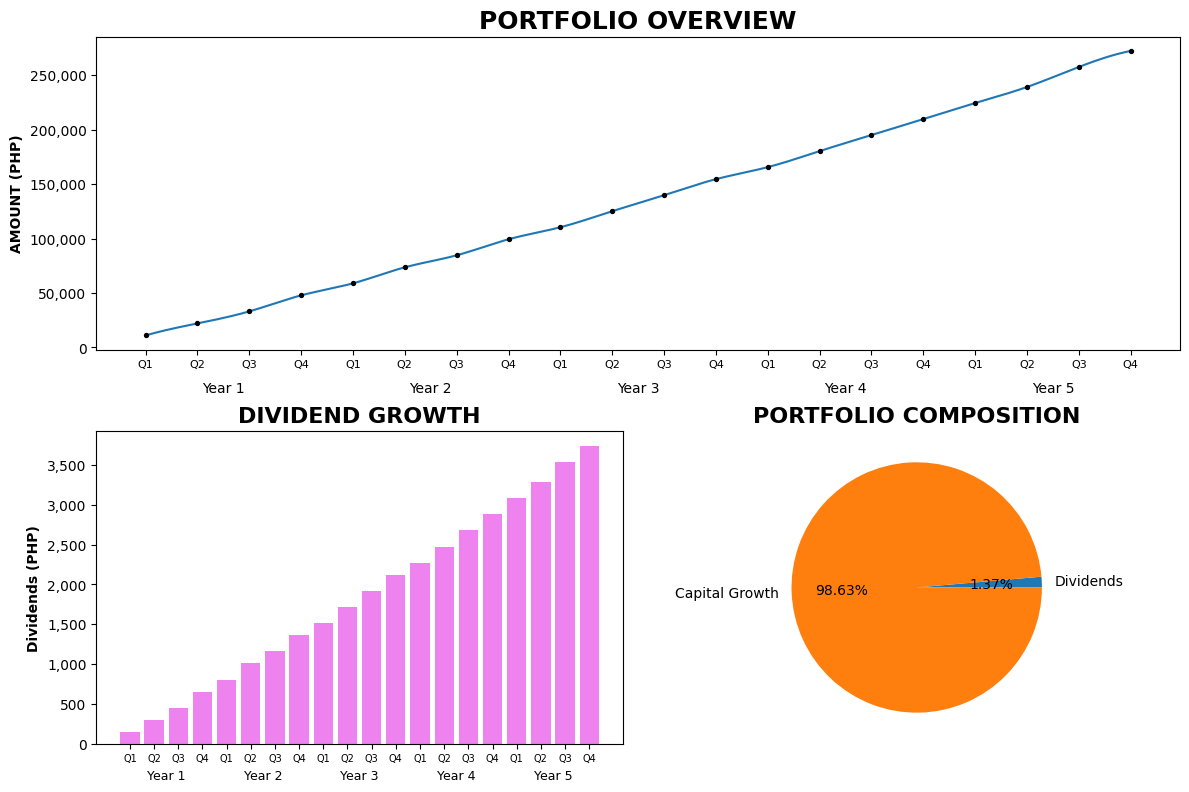

In [4]:
fig = plt.figure(figsize=(12, 8)) # makes a figure
gs = gridspec.GridSpec(2, 2, figure=fig) # splits fig into a 2x2 grid


#----------------------- main graph --------------------------------------
ax_main = fig.add_subplot(gs[0, :]) # graph on first row (index 0) and spans 2 columns

x = data.index
y = data['Amount']

x_smooth = np.linspace(x.min(), x.max(), 300)
spl = make_interp_spline(x, y, k=3)  # creates a cubic spline equation
y_smooth = spl(x_smooth)

ax_main.set_title('PORTFOLIO OVERVIEW', fontweight='bold', fontsize=18)
ax_main.plot(x_smooth, y_smooth)    # plots the curve
ax_main.scatter(x, y, color='black', zorder=3, marker='o', s=8)   # original data points

x1_label = [f'Q{val}'for val in data['Pay-out']]
ax_main.set_xticks(x, x1_label, fontsize=8)

for year in data['Year'].unique():  # second row x-axis
    position = x[data['Year'] == year]
    mid = position.values.mean()
    Year = f'Year {year}'
    ax_main.text(mid,-0.1, Year, ha='center', va='top', transform=ax_main.get_xaxis_transform())

ax_main.yaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f'{x:,.0f}')
)
ax_main.set_ylabel('AMOUNT (PHP)', fontweight='semibold')


# ----------------------- dividends per year --------------------------------------
ax_1 = fig.add_subplot(gs[1,0]) # graph on 2nd row 1st column

ax_1.set_title('DIVIDEND GROWTH', fontweight='bold', fontsize=16)
ax_1.bar(data.index, data['Dividends'], color='violet')     # makes bar graph

x2_label = [f'Q{val}' for val in data['Pay-out']]
ax_1.set_xticks(data.index, x2_label, fontsize=7)

for year in data['Year'].unique():  # second row x-axis
    position = x[data['Year'] == year]
    mid = position.values.mean()
    Year = f'Year {year}'
    ax_1.text(mid,-0.08, Year, ha='center', va='top', fontsize=9, transform=ax_1.get_xaxis_transform())

ax_1.yaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f'{x:,.0f}')
)
ax_1.set_ylabel('Dividends (PHP)', fontweight='semibold')


# ----------------------- portfolio composition  --------------------------------------
ax_2 = fig.add_subplot(gs[1, 1]) # graph on 2nd row 2nd column

# values
div = data.iloc[-1, data.columns.get_loc('Dividends')]
capital_growth = data.iloc[-1, data.columns.get_loc('Amount')] - div
sizes = [div, capital_growth]

labels = ['Dividends', 'Capital Growth']
ax_2.pie(sizes, labels=labels, autopct='%1.2f%%')
ax_2.set_title('PORTFOLIO COMPOSITION', fontweight='bold', fontsize=16)


# show grpah
plt.tight_layout()
plt.show()